# Defining a Model

To begin analyzing exoplanet data, we need to devise a model that can take in data about the exoplanetary system and produce a realistic light curve. Doing this allows us to apply the physical understanding of exoplanets to the light curve data we observe using telescopes. Here, we'll develop that model and test it out by producing some mock light curve data.

## Setting up our function

To make our own exoplanet light curves, we need to create a function that takes in the **times of our observation**, the **radius of the planet** whose light curve we want to model, and the **period** of the transits that occur during our observation:

```{code-block} ipython3
import numpy as np

def square_dip(times, fluxes, planet_radius, period):
    """
    Let's add some comments to our custom function to make sure we don't 
    forget what it does.

    Parameters
    ----------
    times : array
        The observation times of our exoplanet in days.
    fluxes : array
        The flux we anticipate seeing from the star before adding a planet.
    planet_radius : float
        The radius of our exoplanet, in Jupiter radii.
    period : float
        How often the our planet transits in front of the star, in days.

    Returns
    -------
    flux : array
        The values of the normalized amount of light received from the
        parent star.
    """
```


## Converting math to code
```{note}
We'll be doing all our calculations in the meters-kilograms-seconds (or MKS) system, so we need to be sure that we pay special mind to the assumed units.
```

Let's add in the code. We'll assume that the star the planet orbits is Sun-like (i.e. has a mass of $1 \; \mathrm{M_\odot}$), at an inclination of 89 degrees.

```{code-block} ipython3
    ...
    # Convert our times and period from days to seconds
    times = times * 86400
    period = period * 86400

    # Assume we're orbiting a Sun-like parent star 
    # with an 89 degree incline
    G = 6.67e-11  # Gravitational constant in the MKS system
    star_mass = 1 * 1.989e30  # Convert from solar masses in kilograms
    star_radius = 1 * 696.34e6  # Convert from solar radii to meters
    planet_radius = planet_radius * 69.911e6  # Convert from Jupiter radii to meters

    # We'll convert the inclination to radians
    i = np.deg2rad(89)

    # Calculate the semi-major axis of the orbit
    a = ((period ** 2 * G * star_mass) / (4 * np.pi ** 2)) ** (1/3)

    # The impact parameter of the orbit
    b = a * np.cos(i) / star_radius

    # Calculate how long it takes the planet to cross the star
    transit_duration = (period / np.pi) * np.arcsin(np.sqrt((star_radius + planet_radius) ** 2 - b * (star_radius) ** 2) / a)
    
    # Now calculate the transit depth, i.e. how much light is blocked when it transits
    transit_depth = 1 - (planet_radius / star_radius) ** 2
```

## Generating our light curve

At this point, we have our calculations figured out. Now we need to create the flux array that includes the dip in brightness caused by the transit. We'll do that by randomly deciding on a _first_ transit start time, then calculate all the other transits based on our given period.

```{code-block} ipython3
    ...
    # Let's randomly choose a time for our first transit
    first_transit = np.random.uniform(0, times[-1] * 0.2)
    
    transit_start = first_transit
    transit_end = transit_start + transit_duration

    for i in range(len(times)):
        t = times[i]

        # If our time is during a transit, add the transit depth. However, if there
        # are multiple planets, only take the deepest transit depth.
        if transit_start < t < transit_end:
            fluxes[i] = min(transit_depth, fluxes[i])

        # If we've just exited the tranit, reset the
        # our variables for the next transit
        elif t >= transit_end:
            transit_start += period
            transit_end = transit_start + transit_duration

    return fluxes
```

In [1]:
import numpy as np

def square_dip(times, fluxes, planet_radius, period):
    """
    Let's add some comments to our custom function to make sure we don't 
    forget what it does.

    Parameters
    ----------
    times : array
        The observation times of our exoplanet in days.
    fluxes : array
        The flux we anticipate seeing from the star before adding a planet.
    planet_radius : float
        The radius of our exoplanet, in Jupiter radii.
    period : float
        How often the our planet transits in front of the star, in days.

    Returns
    -------
    flux : array
        The values of the normalized amount of light received from the
        parent star.
    """
    # Convert our times and period from days to seconds
    times = times * 86400
    period = period * 86400

    # Assume we're orbiting a Sun-like parent star 
    # with an 89 degree incline
    G = 6.67e-11  # Gravitational constant in the MKS system
    star_mass = 1 * 1.989e30  # Convert from solar masses in kilograms
    star_radius = 1 * 696.34e6  # Convert from solar radii to meters
    planet_radius = planet_radius * 69.911e6  # Convert from Jupiter radii to meters

    # We'll convert the inclination to radius
    i = np.deg2rad(89)

    # Calculate the semi-major axis of the orbit
    a = ((period ** 2 * G * star_mass) / (4 * np.pi ** 2)) ** (1/3)

    # The impact parameter of the orbit
    b = a * np.cos(i) / star_radius

    # Calculate how long it takes the planet to cross the star
    transit_duration = (period / np.pi) * np.arcsin(np.sqrt((star_radius + planet_radius) ** 2 - b * (star_radius) ** 2) / a)
    
    # Now calculate the transit depth, i.e. how much light is blocked when it transits
    transit_depth = 1 - (planet_radius / star_radius) ** 2

    # Let's randomly choose a time for our first transit
    first_transit = np.random.uniform(0, times[-1] * 0.2)
    
    transit_start = first_transit
    transit_end = transit_start + transit_duration

    for i in range(len(times)):
        t = times[i]

        # If our time is during a transit, add the transit depth. However, if there
        # are multiple planets, only take the deepest transit depth.
        if transit_start < t < transit_end:
            fluxes[i] = min(transit_depth, fluxes[i])

        # If we've just exited the tranit, reset the
        # our variables for the next transit
        elif t >= transit_end:
            transit_start += period
            transit_end = transit_start + transit_duration

    return fluxes

## Inspecting the results

Let's test it out with a $5 \; \mathrm{M_{Jupiter}}$ planet and a period of 4 days. **Remember** our normalized flux from the star _without_ any transiting exoplanets is defined to be 1.

Text(0, 0.5, 'Normalized Flux')

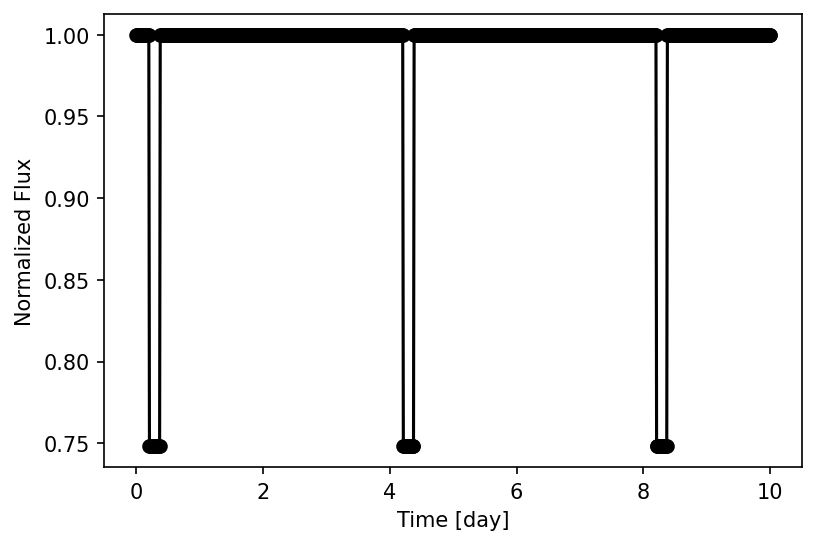

In [2]:
import matplotlib.pyplot as plt

times = np.linspace(0, 10, 1000)
fluxes = np.ones(len(times))

measurements = square_dip(times, fluxes, 5, 4)

f, ax = plt.subplots(dpi=150)

ax.plot(times, measurements, marker='o', color='k')
ax.set_xlabel("Time [day]")
ax.set_ylabel("Normalized Flux")

This looks great, but a little unrealistic. Let's add a function that applies some noise to our data.

In [3]:
def add_noise(fluxes, limit):
    return fluxes + np.random.normal(0, limit, len(fluxes))

Text(0, 0.5, 'Normalized Flux')

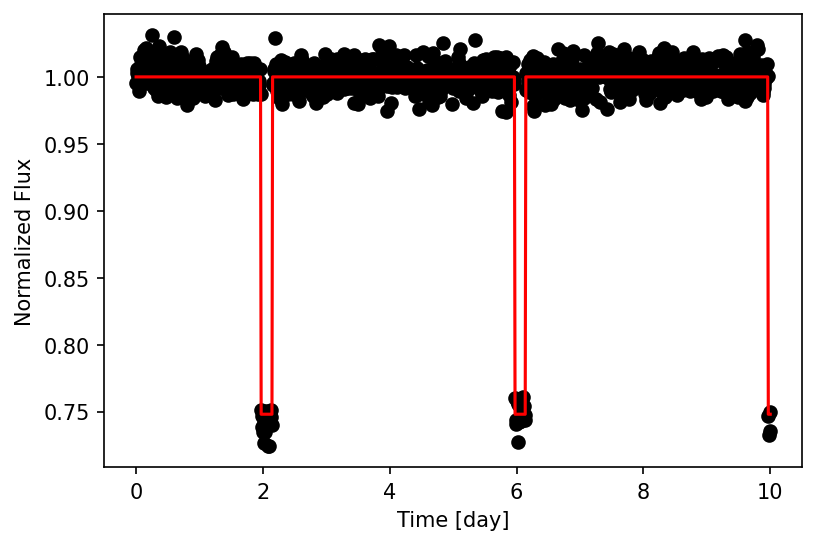

In [4]:
import matplotlib.pyplot as plt

times = np.linspace(0, 10, 1000)
fluxes = np.ones(len(times))

measurements = square_dip(times, fluxes, 5, 4)
measurements_with_noise = add_noise(measurements, 0.01)

f, ax = plt.subplots(dpi=150)

ax.plot(times, measurements_with_noise, color='k', marker='o', linestyle='')
ax.plot(times, measurements, color='red')
ax.set_xlabel("Time [day]")
ax.set_ylabel("Normalized Flux")

## Including more planets

Exoplantary systems often have more than just a single planet. Let's try adding a second planet with a mass of $3 \; \mathrm{M_{Jupiter}}$ and see how that changes our light curve.

Text(0, 0.5, 'Normalized Flux')

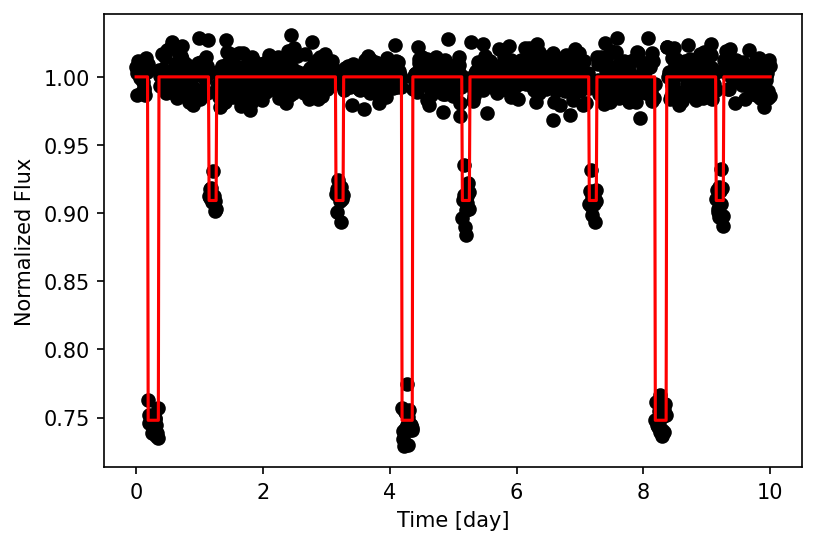

In [5]:
import matplotlib.pyplot as plt

times = np.linspace(0, 10, 1000)
fluxes = np.ones(len(times))

measurements = square_dip(times, fluxes, 5, 4)
measurements = square_dip(times, measurements, 3, 2)
measurements_with_noise = add_noise(measurements, 0.01)

f, ax = plt.subplots(dpi=150)

ax.plot(times, measurements_with_noise, color='k', marker='o', linestyle='')
ax.plot(times, measurements, color='red')
ax.set_xlabel("Time [day]")
ax.set_ylabel("Normalized Flux")

Try plotting more exoplanet light curves using different masses and radii as well as various numbers of exoplanets in the system.

```{admonition} Question 1
:class: tip
In what ways can you imagine that our simulations are simplified, compared to the real universe?
```

```{admonition} Challenge
:class: warning
Assume that a star and a large planet are in circular orbits about a mutual center of mass and are separated by a distance $a$. Assume also that the binary inclination angle is $i$ (defined as the angle between the line-of-sight and the orbital angular momentum vector, with 0$^◦$ ≤ $i$ ≤ 90$^◦$) and that the stellar and planetary radii are R$_1$ and R$_2$, respectively. Find an expression for the smallest inclination angle that will just barely produce a transit signal in your light curve.
```